* Dataset from : https://archive.ics.uci.edu/ml/datasets/Online+Retail#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
df = pd.read_csv("data/online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Attribute Information:

- InvoiceNo: 송장번호. 해당 거래에 할당된 6자리 정수
  * 이 코드가 문자 'c'로 시작하면 취소를 나타냅니다.
- StockCode: 제품 코드. 각 고유 제품에 고유하게 할당된 5자리 정수
- Description: 제품 이름
- Quantity: 거래당 각 제품의 수량 
  * 이 코드가 ‘-’(마이너스)로 시작하면 취소를 나타냅니다.
- InvoiceDate:  송장 날짜 및 시간. 숫자, 각 거래가 생성된 날짜 및 시간
- UnitPrice: 단가. 숫자, 스털링(영국 화폐) 단위의 제품 가격
- CustomerID: 고객 번호. 해당 고객에게 고유하게 할당된 5자리 정수
- Country: 국가 이름. 해당 고객이 거주하는 국가의 이름

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include=["object"])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.isna().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

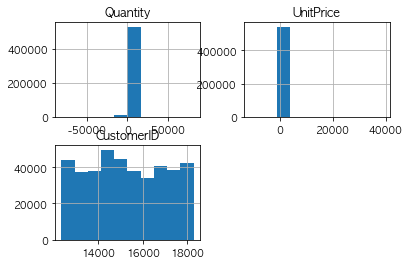

In [9]:
df.hist()

In [10]:
df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]

## 회원 vs 비회원 구매

In [11]:
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [12]:
df.loc[~df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

## 매출액 상위 국가

In [13]:
average_total_price = df.groupby("Country")["TotalPrice"].mean().sort_values(ascending=False).head(10)
sum_total_price = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

print(f"average_total_price by country top 10: \n{average_total_price}")
print("-"*30)
print(f"sum_total_price by country top 10: \n{sum_total_price}")

average_total_price by country top 10: 
Country
Netherlands    120.059696
Australia      108.877895
Japan           98.716816
Sweden          79.211926
Denmark         48.247147
Lithuania       47.458857
Singapore       39.827031
Lebanon         37.641778
Brazil          35.737500
Hong Kong       35.128611
Name: TotalPrice, dtype: float64
------------------------------
sum_total_price by country top 10: 
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


## 상품
* 판매 빈도가 높은 상품

In [14]:
# 상품 판매 빈도가 높은 상품
stock_sale_frequency_top10 = df.groupby(["StockCode"])['InvoiceNo', "Quantity", "TotalPrice"].aggregate(
                    {"InvoiceNo": "count", "Quantity": "sum", "TotalPrice": "sum"},
                    ascending=False
                ).sort_values(by=["InvoiceNo"], ascending=False).head(10)
                #.nlargest(10, "InvoiceNo")
stock_sale_frequency_top10

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,InvoiceNo,Quantity,TotalPrice
StockCode,,,
85123A,2313,38830,97894.50
22423,2203,12980,164762.19
85099B,2159,47363,92356.03
47566,1727,18022,98302.98
20725,1639,18979,35187.31
84879,1502,36221,58959.73
22720,1477,7286,37413.44
22197,1476,56450,50987.47
21212,1385,36039,21059.72


In [15]:
stock_description = df.loc[df['StockCode'].isin(stock_sale_frequency_top10.index), ['StockCode', 'Description']] \
    .drop_duplicates("StockCode").set_index("StockCode")

stock_description.loc[stock_sale_frequency_top10.index]

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
22423,REGENCY CAKESTAND 3 TIER
85099B,JUMBO BAG RED RETROSPOT
47566,PARTY BUNTING
20725,LUNCH BAG RED RETROSPOT
84879,ASSORTED COLOUR BIRD ORNAMENT
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22197,SMALL POPCORN HOLDER
21212,PACK OF 72 RETROSPOT CAKE CASES


In [16]:
stock_sale_frequency_top10['Description'] = stock_description.loc[stock_sale_frequency_top10.index]
stock_sale_frequency_top10

,InvoiceNo,Quantity,TotalPrice,Description
StockCode,,,,
85123A,2313,38830,97894.50,WHITE HANGING HEART T-LIGHT HOLDER
22423,2203,12980,164762.19,REGENCY CAKESTAND 3 TIER
85099B,2159,47363,92356.03,JUMBO BAG RED RETROSPOT
47566,1727,18022,98302.98,PARTY BUNTING
20725,1639,18979,35187.31,LUNCH BAG RED RETROSPOT
84879,1502,36221,58959.73,ASSORTED COLOUR BIRD ORNAMENT
22720,1477,7286,37413.44,SET OF 3 CAKE TINS PANTRY DESIGN
22197,1476,56450,50987.47,SMALL POPCORN HOLDER
21212,1385,36039,21059.72,PACK OF 72 RETROSPOT CAKE CASES


## 구매 취소 비율

In [17]:
df["Cancel"] = df["Quantity"] < 0

In [18]:
# 고객별 구매취소 비율
df.groupby("CustomerID")["Cancel"].value_counts().unstack()

Cancel,False,True
CustomerID,,
12346.0,1.0,1.0
12347.0,182.0,NaN
12348.0,31.0,NaN
12349.0,73.0,NaN
12350.0,17.0,NaN
...,...,...
18280.0,10.0,NaN
18281.0,7.0,NaN
18282.0,12.0,1.0


### 특정 고객의 구매 건 조회

In [19]:
# InvoiceNo : 구매한 상품 개수
# Cancel : 구매한 상품 대비 취소 건수

cancel_customer_proportion = df.groupby("CustomerID").aggregate(
    {"InvoiceNo": "count", "Cancel": "mean"}
).sort_values(by=["Cancel"], ascending=False)

cancel_customer_proportion

,InvoiceNo,Cancel
CustomerID,,
16061.0,1,1.0
16262.0,3,1.0
12503.0,1,1.0
12505.0,1,1.0
17547.0,2,1.0
...,...,...
15494.0,125,0.0
13325.0,12,0.0
13323.0,21,0.0


### 국가별 구매 취소 비율

In [20]:
cancel_country_proportion = df.groupby(["Country"]).aggregate(
                                                    {"InvoiceNo": "count", "Cancel": "mean"},
                                                    ).sort_values(by=["Cancel"], ascending=False)

cancel_country_proportion

,InvoiceNo,Cancel
Country,,
USA,291,0.384880
Czech Republic,30,0.166667
Malta,127,0.118110
Japan,358,0.103352
Saudi Arabia,10,0.100000
Australia,1259,0.058777
Italy,803,0.056040
Bahrain,19,0.052632
Germany,9495,0.047709


## 날짜와 시간

In [21]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [22]:
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.strftime("%A")
# df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,Wednesday,08:26:00,8


In [23]:
df["InvoiceYM"] = df["InvoiceDate"].dt.strftime("%Y-%m")
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,Wednesday,08:26:00,8,2010-12


<AxesSubplot:xlabel='InvoiceYear', ylabel='count'>

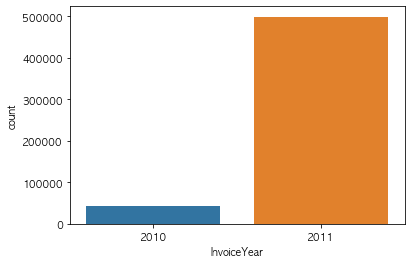

In [24]:
sns.countplot(x="InvoiceYear", data=df)

<AxesSubplot:xlabel='InvoiceMonth', ylabel='count'>

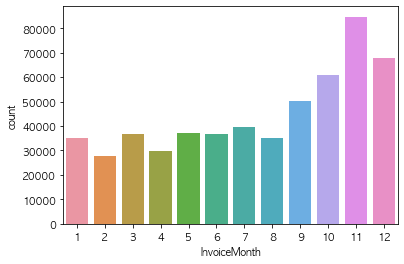

In [25]:
sns.countplot(x="InvoiceMonth", data=df)

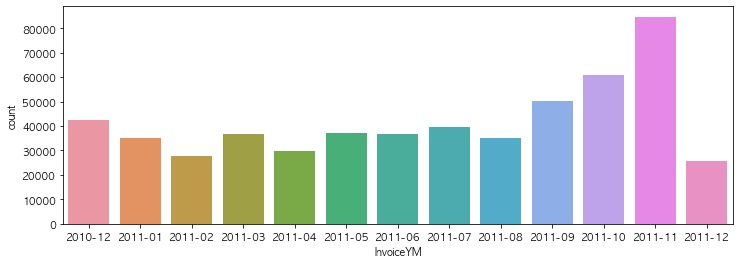

In [26]:
plt.figure(figsize=(12, 4))
sns.countplot(x="InvoiceYM", data=df)
plt.show()

### 요일별 빈도수

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

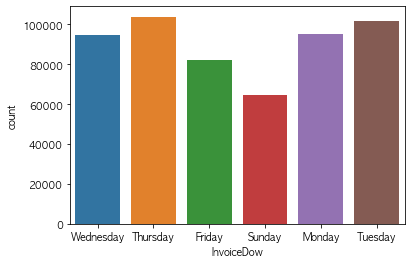

In [27]:
sns.countplot(x="InvoiceDow", data=df)

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

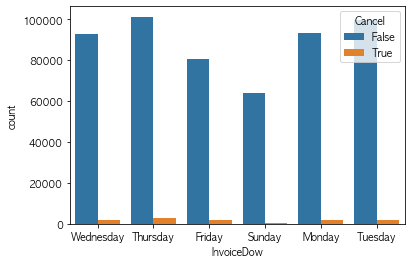

In [28]:
sns.countplot(x="InvoiceDow", data=df, hue="Cancel")

<AxesSubplot:title={'center':'요일 별 구매 취소'}, xlabel='InvoiceDow', ylabel='count'>

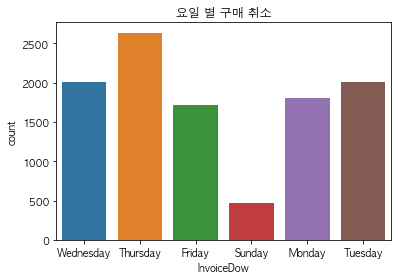

In [29]:
plt.title("요일 별 구매 취소")
sns.countplot(x="InvoiceDow", data=df[df["Cancel"] == True])

In [30]:
df['InvoiceDow'].value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: InvoiceDow, dtype: int64

<AxesSubplot:xlabel='InvoiceHour', ylabel='count'>

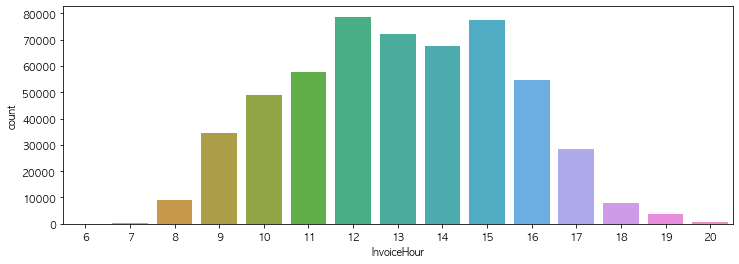

In [31]:
plt.figure(figsize=(12, 4))
sns.countplot(x="InvoiceHour", data=df)

<AxesSubplot:xlabel='InvoiceHour', ylabel='TotalPrice'>

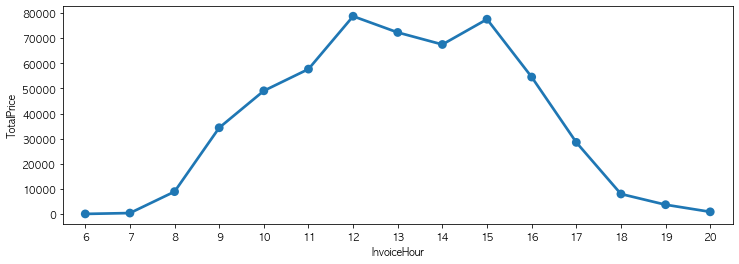

In [32]:
plt.figure(figsize=(12, 4))
sns.pointplot(x="InvoiceHour", y="TotalPrice", data=df, estimator=len, ci=None)

## 시간-요일별 빈도수

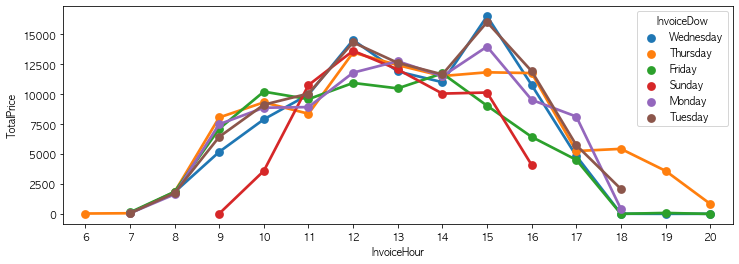

In [33]:
plt.figure(figsize=(12, 4))
sns.pointplot(x="InvoiceHour", y="TotalPrice", data=df, estimator=len, ci=None, hue="InvoiceDow")
plt.show()


<AxesSubplot:xlabel='InvoiceDow', ylabel='InvoiceHour'>

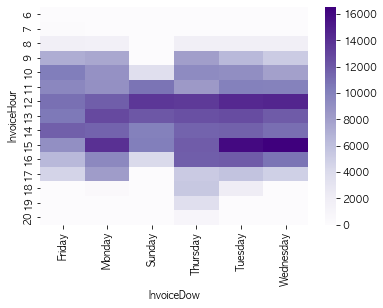

In [34]:
sns.heatmap(pd.crosstab(df["InvoiceHour"], df["InvoiceDow"]), cmap="Purples")

## 고객ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

* 취소와 취소에 대한 본 주문건 제거
* 고객ID가 없는 건도 제거

In [35]:
df_valid = df[(df["CustomerID"].notnull()) & (df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,Wednesday,08:26:00,8,2010-12


In [36]:
df_valid.drop_duplicates(inplace=True)
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,2010,12,1,Wednesday,08:26:00,8,2010-12


## 고객
* ARPU(Average Revenue Per User) : 
    * 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
    * ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수
* ARPPU(Average Revenue Per Paying User):
    * 지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치
    

* [ARPU - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/ARPU)
* [ARPPU](https://terms.naver.com/entry.naver?docId=2028542&cid=42914&categoryId=42915)

In [37]:
arppu = df.groupby("InvoiceYM").agg(
    {"TotalPrice": "sum", "CustomerID" : "nunique"},
    )
arppu["ARPPU"] = arppu["TotalPrice"] / arppu["CustomerID"]

arppu

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,748957.020,948,790.039051
2011-01,560000.260,783,715.198289
2011-02,498062.650,798,624.138659
2011-03,683267.080,1020,669.869686
2011-04,493207.121,899,548.617487
2011-05,723333.510,1079,670.373967
2011-06,691123.120,1051,657.586223
2011-07,681300.111,993,686.102831
2011-08,682680.510,980,696.612765


In [38]:
customer_aggregation = df_valid.groupby("CustomerID").agg({
    "TotalPrice": ["mean", "sum"], "InvoiceNo": "count"}
)

customer_aggregation

TotalPrice           InvoiceNo
                    mean       sum     count
CustomerID                                  
12346.0     77183.600000  77183.60         1
12347.0        23.681319   4310.00       182
12348.0        57.975484   1797.24        31
12349.0        24.076027   1757.55        73
12350.0        19.670588    334.40        17
...                  ...       ...       ...
18280.0        18.060000    180.60        10
18281.0        11.545714     80.82         7
18282.0        14.837500    178.05        12
18283.0         2.837074   2045.53       721
18287.0        26.246857   1837.28        70

[4338 rows x 3 columns]

## MAU(Monthly Active User)

In [39]:
df_valid.groupby("InvoiceYM").agg({"CustomerID": "nunique"})

,CustomerID
InvoiceYM,
2010-12,885
2011-01,741
2011-02,758
2011-03,974
2011-04,856
2011-05,1056
2011-06,991
2011-07,949
2011-08,935


## 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [40]:
InvoiceYM_aggregation = df_valid.groupby("InvoiceYM").agg({
    "InvoiceNo": "count",
    "StockCode": "nunique",
    "CustomerID": "nunique",
    "UnitPrice": "sum",
    "Quantity": "sum",
    "TotalPrice": "sum"
})

InvoiceYM_aggregation


,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,80679.600,311048,570422.730
2011-01,20988,2121,741,66234.650,348473,568101.310
2011-02,19706,2124,758,62619.480,265027,446084.920
2011-03,26870,2234,974,87864.790,347582,594081.760
2011-04,22433,2217,856,78543.481,291366,468374.331
2011-05,28073,2219,1056,101500.910,372864,677355.150
2011-06,26926,2339,991,84602.660,363014,660046.050
2011-07,26580,2351,949,75454.521,367360,598962.901
2011-08,26790,2356,935,78877.090,397373,644051.040


## 월단위 데이터 전처리

In [41]:
df_valid['InvoiceDate1'] = pd.to_datetime(df_valid['InvoiceYM'])
df_valid[['InvoiceDate', 'InvoiceDate1']].sample(3)

,InvoiceDate,InvoiceDate1
61796,2011-01-18 13:05:00,2011-01-01
305178,2011-08-18 10:36:00,2011-08-01
259785,2011-07-12 10:47:00,2011-07-01


In [42]:
df_valid["InvoiceDateMin"] = df_valid.groupby(["CustomerID"])["InvoiceDate1"].transform(min)
df_valid[["InvoiceDateMin", "InvoiceDate1", "InvoiceDate"]].sample(3)

,InvoiceDateMin,InvoiceDate1,InvoiceDate
439435,2011-03-01,2011-11-01,2011-11-04 12:05:00
503351,2010-12-01,2011-11-01,2011-11-27 12:10:00
378556,2011-01-01,2011-10-01,2011-10-05 12:52:00


### 첫 구매일로 부터 몇 달째 구매인가?

In [43]:
year_diff = df_valid["InvoiceDate1"].dt.year - df_valid["InvoiceDateMin"].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid["InvoiceDateMin"].dt.month

df_valid["CohortIndex"] = year_diff * 12 + month_diff + 1
df_valid[["InvoiceDate1", "InvoiceDateMin", "CohortIndex"]].sample(3)

,InvoiceDate1,InvoiceDateMin,CohortIndex
335297,2011-09-01,2010-12-01,10
361376,2011-09-01,2011-08-01,2
249980,2011-07-01,2010-12-01,8


### 코호트 월별 빈도수

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

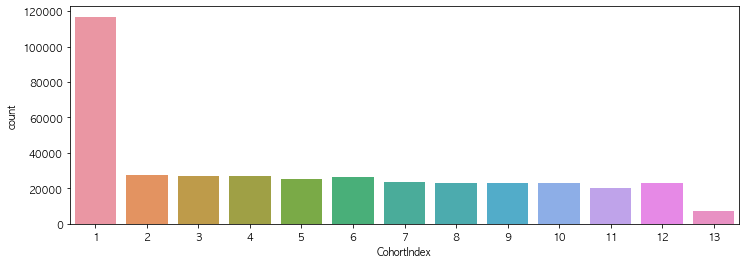

In [44]:
plt.figure(figsize=(12, 4))
sns.countplot(x="CohortIndex", data=df_valid)

## 잔존 빈도 구하기

In [45]:
Cohort_count = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])['CustomerID'].nunique().unstack()
Cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

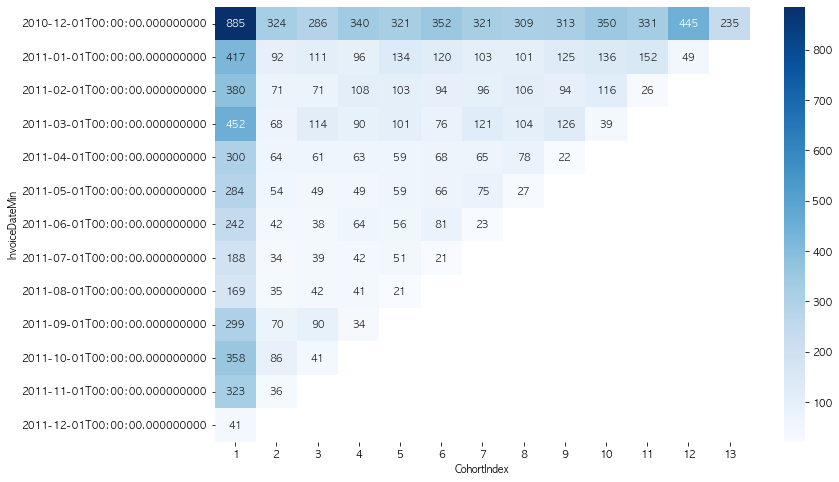

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(Cohort_count, annot=True, cmap="Blues", fmt=".0f")

### 월별 신규 유입 고객 수 
* Acqusition

In [47]:
Cohort_count[1]

InvoiceDateMin
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

<AxesSubplot:title={'center':'Acquision'}, xlabel='InvoiceDateMin'>

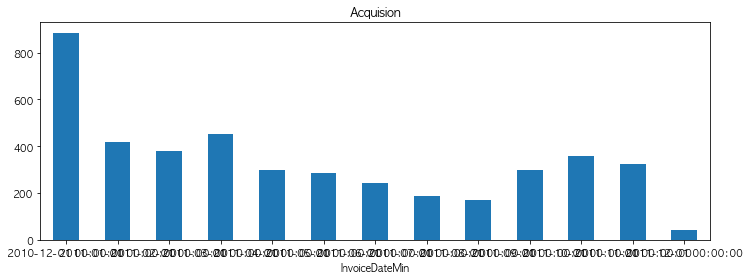

In [51]:
Cohort_count[1].plot.bar(figsize=(12, 4), rot=0, title='Acquision')

## 잔존율 구하기

In [59]:
residual_rate = Cohort_count.div(Cohort_count[1], axis=0)

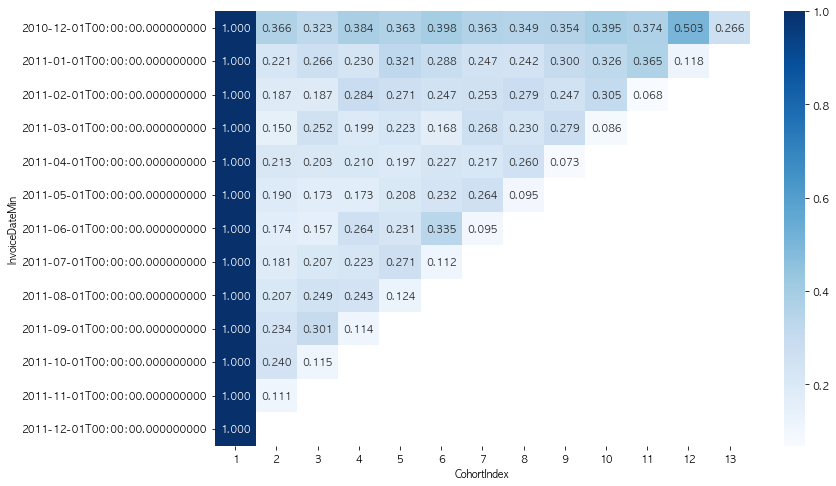

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(residual_rate, annot=True, cmap="Blues", fmt=".3f")
plt.show()

In [70]:
Sales_sum = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])['TotalPrice'].sum().unstack()
Sales_sum = Sales_sum.div(Sales_sum[1], axis=0)


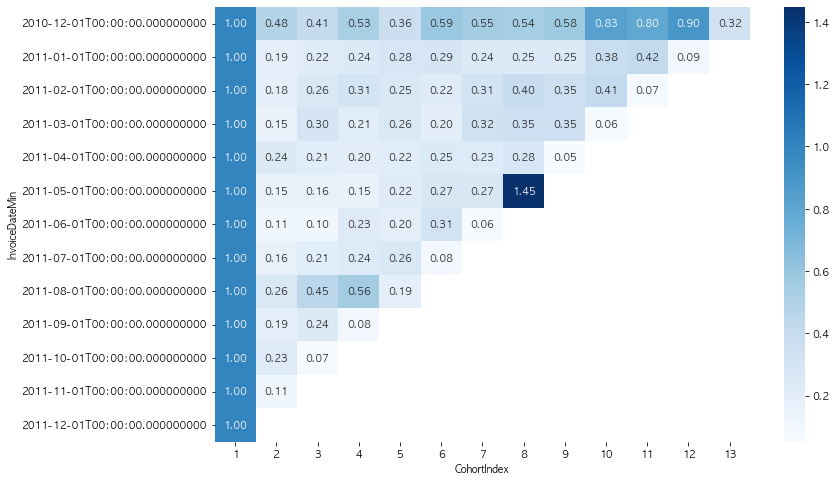

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(Sales_sum, annot=True, cmap="Blues", fmt=".2f")
plt.show()